In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data =pd.read_csv('C:/Users/MY PC/Desktop/bank_data.csv', sep=';', header=0 )
df= pd.DataFrame(data)

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
print('Total number of rows and columns in table')
df.shape

Total number of rows and columns in table


(45211, 17)

In [5]:
print('Total number of non-null values in each column')
df.info()

Total number of non-null values in each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
print('Statistical info about each column in table')
df.describe()

Statistical info about each column in table


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#checking the invalid or incorrect data in table
#age
invalid_age = df[(df['age'] <0) | (df['age'] >110)]
print('Invalid age present in age column is:',invalid_age)

Invalid age present in age column is: Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [8]:
#finding the duplicate rows in table
duplicate_rows = df[df.duplicated()]
print('The duplicate rows in data frame are:', duplicate_rows)

The duplicate rows in data frame are: Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [9]:
#finding all the null values in table
null_values = df.isnull().sum()
print('All the null values present in the table',null_values)

All the null values present in the table age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
#outliers on balance
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 -Q1
print('the difference in outliers for balance values is:',IQR)

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Lower bound value is:',Q1)
print('Upper bound value is:',Q3)

outliers = (df['balance']<Lower_bound) | (df['balance']>Upper_bound)
counts = outliers.value_counts()
print('Total number of outliers in balance column are:',counts)

#to know all the outlier values in table
#outliers_values = df.loc[outliers, 'balance']
#print(outliers_values)

the difference in outliers for balance values is: 1356.0
Lower bound value is: 72.0
Upper bound value is: 1428.0
Total number of outliers in balance column are: balance
False    40482
True      4729
Name: count, dtype: int64


In [11]:
#Outliers on days
Q1 = df['day'].quantile(0.25)
Q3 = df['day'].quantile(0.75)
IQR = Q3 - Q1
print('The difference in outliers for duration value is: ',IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Lower bound value is: ',Q1)
print('Upper bound value is: ',Q3)
outliers = (df['day']<Lower_bound) | (df['day']>Upper_bound)
outliers_count = outliers.value_counts()
print('Total number of outliers in duration column are:',outliers_count)

#to know all the outlier values in table
#outliers_values = df.loc[outliers, 'day']
#print(outliers_values)

The difference in outliers for duration value is:  13.0
Lower bound value is:  8.0
Upper bound value is:  21.0
Total number of outliers in duration column are: day
False    45211
Name: count, dtype: int64


In [12]:
#Outliers on duration
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
print('The difference in outliers for duration value is: ',IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Lower bound value is: ',Lower_bound)
print('Upper bound value is: ',Upper_bound)
outliers  = (df['duration']<Lower_bound) | (df['duration']>Upper_bound)
outliers_count = outliers.value_counts()
print('Total number of outliers in duration column are:',outliers_count)

#to know all the outlier values in table
#outlier_values = df_analysis.loc[outliers, 'duration']
#print(outlier_values)

The difference in outliers for duration value is:  216.0
Lower bound value is:  -221.0
Upper bound value is:  643.0
Total number of outliers in duration column are: duration
False    41976
True      3235
Name: count, dtype: int64


In [13]:
#Outliers on campaign
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1
print('The difference in outliers for duration value is: ',IQR)
Lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower bound value is: ',Lower_bound)
print('Upper bound value is: ',Upper_bound)
outliers = (df['campaign']<Lower_bound) | (df['campaign']>Upper_bound)
outliers_count = outliers.value_counts()
print('Total number of outliers in duration column are:',outliers_count)

#to know all the outlier values in table
#outlier_values = df_analysis.loc[outliers, 'campaign']
#print(outlier_values)

The difference in outliers for duration value is:  2.0
Lower bound value is:  -2.0
Upper bound value is:  643.0
Total number of outliers in duration column are: campaign
False    45211
Name: count, dtype: int64


In [14]:
#Outliers on pdays
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)
IQR = Q3 - Q1
print('The difference in outliers for pdays value is: ',IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Lower bound value is: ',Lower_bound)
print('Upper bound value is: ',Upper_bound)
outliers = (df['pdays']<Lower_bound) | (df['pdays']>Upper_bound)
outliers_count = outliers.value_counts()
print('Total number of outliers in pdays column are:',outliers_count)

#to know all the outlier values in table
#outlier_values = df_analysis.loc[outliers, 'pdays']
#print(outlier_values)

The difference in outliers for pdays value is:  0.0
Lower bound value is:  -1.0
Upper bound value is:  -1.0
Total number of outliers in pdays column are: pdays
False    36954
True      8257
Name: count, dtype: int64


In [15]:
#Outliers on previous
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1
print('The difference in outliers for previos value is: ',IQR)
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print('Lower bound value is: ',Lower_bound)
print('Upper bound value is: ',Upper_bound)
outliers = (df['previous']<Lower_bound) | (df['previous']>Upper_bound)
outliers_count = outliers.value_counts()
print('Total number of outliers in previos column are:',outliers_count)

#to know all the outlier values in table
#outlier_values = df_analysis.loc[outliers, 'previous']
#print(outlier_values)

The difference in outliers for previos value is:  0.0
Lower bound value is:  0.0
Upper bound value is:  0.0
Total number of outliers in previos column are: previous
False    36954
True      8257
Name: count, dtype: int64


In [16]:
#total employees in each department
dept_counts = df['job'].value_counts()
print(dept_counts)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [17]:
print('Age demographics')
df['age'].describe()

Age demographics


count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [18]:
#unique jobs and education levels
df_analysis_edu = df['education'].unique()
df_analysis_job = df['job'].unique()
print('Education Levels:', df_analysis_edu)
print('Job Categories:', df_analysis_job)

Education Levels: ['tertiary' 'secondary' 'unknown' 'primary']
Job Categories: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [19]:
#common educaion, and education correlation to the job
df_analysis_edu_job = pd.crosstab(df['education'],df['job'])
df_analysis_edu_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,209,3758,183,627,294,795,130,345,44,158,257,51
secondary,4219,5371,542,395,1121,984,577,3457,508,5229,728,71
tertiary,572,149,686,173,7801,366,833,202,223,1968,289,39
unknown,171,454,76,45,242,119,39,150,163,242,29,127


In [20]:
df_analysis = df.copy()


In [21]:
#impact on bank based on martial status, job and campaign
df_analysis_marital_status = pd.crosstab(index = df_analysis['job'],columns = df_analysis['marital'],values = df_analysis['campaign'],
                                            aggfunc = 'sum', margins=True, margins_name = 'Total')
df_analysis_marital_status

marital,divorced,married,single,Total
job,,,,
admin.,1795,7260,4262,13317
blue-collar,1931,20194,5290,27415
entrepreneur,489,3107,567,4163
housemaid,469,2674,355,3498
management,3097,15529,8465,27091
retired,1029,4022,262,5313
self-employed,340,3144,1021,4505
services,1383,6884,3025,11292
student,16,140,2001,2157


In [22]:
#departments affected based on retirement age(60+)
retire_soon = df_analysis['age'] >= 60
retire_by_dept = (df_analysis[retire_soon].groupby('job')['age'].count().sort_values(ascending=False))
retire_by_dept

job
retired          1090
management        192
housemaid         101
blue-collar        98
technician         88
admin.             80
self-employed      41
unknown            28
entrepreneur       26
services           22
unemployed         18
Name: age, dtype: int64

In [23]:
#average balance in each department
avg_bal = df_analysis['balance'].mean()
avg_bal_by_job = (df_analysis.groupby('job')['balance'].agg(avg_bal ='mean').sort_values('avg_bal',ascending=False))
avg_bal_by_job

,avg_bal
job,
retired,1984.215106
unknown,1772.357639
management,1763.616832
self-employed,1647.970868
unemployed,1521.745971
entrepreneur,1521.470074
housemaid,1392.395161
student,1388.060768
technician,1252.632092


In [24]:
#Average balance in department and the signficant disparities
df_analysis.groupby('job')['balance'].agg([
    ('avg_balance', 'mean'),
    ('count_customers', 'count'),
    ('median_balance', 'median')
]).sort_values('avg_balance', ascending=False)

,avg_balance,count_customers,median_balance
job,,,
retired,1984.215106,2264,787.0
unknown,1772.357639,288,677.0
management,1763.616832,9458,572.0
self-employed,1647.970868,1579,526.0
unemployed,1521.745971,1303,529.0
entrepreneur,1521.470074,1487,352.0
housemaid,1392.395161,1240,406.0
student,1388.060768,938,502.0
technician,1252.632092,7597,421.0


In [25]:
#balance percentile
bal_percentile = df_analysis['balance'].quantile([0.10,0.25,0.50,0.75,0.90])
bal_percentile

0.10       0.0
0.25      72.0
0.50     448.0
0.75    1428.0
0.90    3574.0
Name: balance, dtype: float64

In [26]:
#correlation between age and balance
corr_bal_age = df_analysis['age'].corr(df_analysis['balance'])
print('Relation between age and balance:',corr_bal_age)
avg_bal_by_age = ( df_analysis.groupby('age')['balance'].mean().sort_index())
print(avg_bal_by_age.head(5))
print(avg_bal_by_age.tail(5))

Relation between age and balance: 0.0977827393713475
age
18    372.416667
19    539.771429
20    841.940000
21    866.759494
22    935.604651
Name: balance, dtype: float64
age
90     356.5
92     775.0
93     775.0
94    1234.0
95    1141.0
Name: balance, dtype: float64


In [27]:
#employees age group
bins = [18, 30, 50, np.inf]
labels = ['young', 'middle_age', 'older']

df_analysis['age_group'] = pd.cut(df_analysis['age'], bins =bins, labels=labels, right=True)

age_group_count = df_analysis['age_group'].value_counts()
print(age_group_count)

age_group_pct = (df_analysis['age_group'].value_counts(normalize=True) *100).round(1)
print(age_group_pct)

age_group
middle_age    28926
older          9255
young          7018
Name: count, dtype: int64
age_group
middle_age    64.0
older         20.5
young         15.5
Name: proportion, dtype: float64


In [28]:
#employees in each age group hold each job title/department
bins = [18, 30, 40, 50, 60, np.inf]
labels = ['18-29', '30-39', '40-49', '50-60', '60+']
df_analysis['age_group'] = pd.cut(df_analysis['age'], bins=bins, labels=labels, right=True)
age_job = pd.crosstab(df_analysis['age_group'],df_analysis['job'])
age_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age_group,,,,,,,,,,,,
18-29,966,1438,135,67,1203,4,248,822,757,1156,203,19
30-39,2130,3964,559,332,4166,36,626,1745,159,3443,476,51
40-49,1297,2830,469,360,2383,112,404,1031,10,1891,349,103
50-60,753,1474,311,425,1601,1237,277,554,0,1077,265,93
60+,25,26,13,56,105,875,24,2,0,30,10,22


In [29]:
#Success Rates: % of campaigns resulted in "yes" responses
df_analysis['yes_flag'] = (df_analysis['y'] == 'yes').astype(int)

success_by_contact = (
    df_analysis.groupby('contact')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(success_by_contact)

#total summary on all contacts
summary = df_analysis.groupby('contact').agg(
    total_contacts = ('y', 'count'),
    yes_count      = ('yes_flag', 'sum'),
    yes_rate_pct   = ('yes_flag', lambda x: round(x.mean()*100, 1))
)

print(summary)


contact
cellular     14.9
telephone    13.4
unknown       4.1
Name: yes_flag, dtype: float64
           total_contacts  yes_count  yes_rate_pct
contact                                           
cellular            29285       4369          14.9
telephone            2906        390          13.4
unknown             13020        530           4.1


In [30]:
#Average campaign duration
avg_duration = df_analysis['duration'].mean()
print(f"Average campaign duration: {avg_duration:.1f} seconds")

# success flag
df_analysis['yes_flag'] = (df_analysis['y'] == 'yes').astype(int)

# define duration bins in seconds (adjust thresholds for your data)
bins   = [0, 100, 300, np.inf]
labels = ['short', 'medium', 'long']

df_analysis['duration_group'] = pd.cut(df_analysis['duration'], bins=bins, labels=labels, right=True)

# success rate per duration group
duration_success = (
    df_analysis.groupby('duration_group')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(duration_success)

#Correlation between duration and success
corr_duration_success = df_analysis['duration'].corr(df_analysis['yes_flag'])
print("Correlation duration vs success:", corr_duration_success)


Average campaign duration: 258.2 seconds
duration_group
short      1.1
medium     7.8
long      28.2
Name: yes_flag, dtype: float64
Correlation duration vs success: 0.3945210158945624


C:\Users\MY PC\AppData\Local\Temp\ipykernel_19780\3206560983.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis.groupby('duration_group')['yes_flag']


In [31]:
# Success rate by contact method
contact_success = (
    df_analysis.groupby('contact')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(contact_success)


contact
cellular     14.9
telephone    13.4
unknown       4.1
Name: yes_flag, dtype: float64


In [32]:
# Campaign frequency per employee
df_analysis['pseudo_id'] = (
    df_analysis['age'].astype(str) + '_' +
    df_analysis['job'] + '_' +
    df_analysis['marital'] + '_' +
    df_analysis['education']
)

# campaigns per pseudo-client
campaigns_per_client = df_analysis.groupby('pseudo_id')['campaign'].sum()
avg_campaigns = campaigns_per_client.mean()
print("Approx. avg campaigns per pseudo-client:", avg_campaigns)


Approx. avg campaigns per pseudo-client: 34.35688754467968


In [33]:
#Previous contact impact
df_analysis['has_previous'] = df_analysis['previous'] > 0

prev_impact = (
    df_analysis.groupby('has_previous')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(prev_impact)

#Impact of previous outcome
print('Impact fromprevious outcomes are:')
poutcome_impact = (
    df_analysis.groupby('poutcome')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(poutcome_impact)


has_previous
False     9.2
True     23.1
Name: yes_flag, dtype: float64
Impact fromprevious outcomes are:
poutcome
failure    12.6
other      16.7
success    64.7
unknown     9.2
Name: yes_flag, dtype: float64


In [34]:
#Success rate by day of month
success_by_day = (
    df_analysis.groupby('day')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(success_by_day.sort_index())   

#Success rate by month
success_by_month = (
    df_analysis.groupby('month')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(success_by_month)

day
1     28.0
2     14.1
3     16.5
4     15.9
5     11.3
6      9.4
7      8.6
8     10.9
9     11.5
10    23.1
11    12.2
12    15.2
13    15.2
14    11.4
15    14.0
16    13.6
17     9.1
18     9.9
19     6.9
20     7.0
21     9.9
22    17.0
23    13.4
24    13.9
25    15.8
26    11.2
27    13.4
28     7.8
29     7.4
30    17.3
31     7.2
Name: yes_flag, dtype: float64
month
apr    19.7
aug    11.0
dec    46.7
feb    16.6
jan    10.1
jul     9.1
jun    10.2
mar    52.0
may     6.7
nov    10.2
oct    43.8
sep    46.5
Name: yes_flag, dtype: float64


In [35]:
#Employee segments (high‑value, flight‑risk, development potential)
salary_p75 = df_analysis['balance'].quantile(0.75)   
salary_p25 = df_analysis['balance'].quantile(0.25)   
yes_rate = df_analysis['yes_flag'].mean()

def segment(row):
    if row['balance'] >= salary_p75 and row['yes_flag'] == 1:
        return 'high_value'
    elif row['balance'] <= salary_p25 and row['yes_flag'] == 0:
        return 'flight_risk'
    elif row['balance'] <= salary_p25 and row['yes_flag'] == 1:
        return 'development_potential'
    else:
        return 'standard'

df_analysis['segment'] = df_analysis.apply(segment, axis=1)

print(df_analysis['segment'].value_counts())


segment
standard                 32069
flight_risk              10498
high_value                1825
development_potential      819
Name: count, dtype: int64


In [36]:
# High‑value employee identification (top performers)
key_roles = ['management', 'technician', 'entrepreneur']  

high_salary = df_analysis['balance'] >= salary_p75

top_performers = df_analysis[
    high_salary &
    df_analysis['job'].isin(key_roles) &
    (df_analysis['yes_flag'] == 1)
]

print(top_performers[['age','job','balance','y']].head())

      age         job  balance    y
446    39  technician    45248  yes
1193   35  management     3837  yes
1372   43  management     2067  yes
2485   48  management     1949  yes
2519   52  management     2240  yes


In [37]:
#Retention risk by job title and age group
bins   = [18, 30, 40, 50, 60, np.inf]
labels = ['18-30','31-40','41-50','51-60','60+']
df_analysis['age_group'] = pd.cut(df_analysis['age'], bins=bins, labels=labels, right=True)

df_analysis['risk_flag'] = (
    (df_analysis['balance'] <= salary_p25) &   
    (df_analysis['yes_flag'] == 0)             
)


risk_by_job = (
    df_analysis.groupby('job')['risk_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(risk_by_job.sort_values(ascending=False))

risk_by_age = (
    df_analysis.groupby('age_group')['risk_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(risk_by_age.sort_values(ascending=False))


job
services         27.3
entrepreneur     25.4
blue-collar      25.2
housemaid        24.8
technician       24.3
admin.           24.0
management       21.3
unemployed       20.6
self-employed    19.6
unknown          18.4
retired          17.0
student          12.0
Name: risk_flag, dtype: float64
age_group
31-40    24.5
41-50    23.7
18-30    23.5
51-60    21.8
60+       7.6
Name: risk_flag, dtype: float64


C:\Users\MY PC\AppData\Local\Temp\ipykernel_19780\3310252196.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis.groupby('age_group')['risk_flag']


In [38]:
# Potential problem areas departments with issues
dept_summary = df_analysis.groupby('job').agg(
    count          = ('y', 'count'),
    avg_balance     = ('balance', 'mean'),
    balance_std     = ('balance', 'std'),
    yes_rate_pct   = ('yes_flag', lambda x: round(x.mean()*100, 1)),
    risk_rate_pct  = ('risk_flag', lambda x: round(x.mean()*100, 1))
)

print(dept_summary.sort_values('risk_rate_pct', ascending=False))


               count  avg_balance  balance_std  yes_rate_pct  risk_rate_pct
job                                                                        
services        4154   997.088108  2164.493505           8.9           27.3
entrepreneur    1487  1521.470074  4153.442626           8.3           25.4
blue-collar     9732  1078.826654  2240.523208           7.3           25.2
housemaid       1240  1392.395161  2984.692098           8.8           24.8
technician      7597  1252.632092  2548.544019          11.1           24.3
admin.          5171  1135.838909  2641.962686          12.2           24.0
management      9458  1763.616832  3822.965605          13.8           21.3
unemployed      1303  1521.745971  3144.666754          15.5           20.6
self-employed   1579  1647.970868  3684.259573          11.8           19.6
unknown          288  1772.357639  2970.288559          11.8           18.4
retired         2264  1984.215106  4397.044177          22.8           17.0
student     

In [39]:
#departments get most attention vs results
dept_alloc = df_analysis.groupby('job').agg(
    total_contacts = ('y', 'count'),
    success_cnt    = ('yes_flag', 'sum')
)

dept_alloc['success_rate_pct'] = (dept_alloc['success_cnt'] / dept_alloc['total_contacts'] * 100).round(1)
print(dept_alloc.sort_values('total_contacts', ascending=False))


               total_contacts  success_cnt  success_rate_pct
job                                                         
blue-collar              9732          708               7.3
management               9458         1301              13.8
technician               7597          840              11.1
admin.                   5171          631              12.2
services                 4154          369               8.9
retired                  2264          516              22.8
self-employed            1579          187              11.8
entrepreneur             1487          123               8.3
unemployed               1303          202              15.5
housemaid                1240          109               8.8
student                   938          269              28.7
unknown                   288           34              11.8


In [40]:
#optimal campaign duration, follow‑up timing
bins   = [0, 60, 180, 600, np.inf]
labels = ['0-1min','1-3min','3-10min','10+min']

df_analysis['duration_band'] = pd.cut(df_analysis['duration'], bins=bins, labels=labels)

duration_perf = (
    df_analysis.groupby('duration_band')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(duration_perf)

duration_band
0-1min      0.2
1-3min      3.9
3-10min    14.6
10+min     48.4
Name: yes_flag, dtype: float64


C:\Users\MY PC\AppData\Local\Temp\ipykernel_19780\3895109160.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis.groupby('duration_band')['yes_flag']


In [41]:
#segments needing least effort for best results
effort_outcome = df_analysis.groupby('segment').agg(
    avg_contacts    = ('campaign', 'mean'),
    success_rate_pct = ('yes_flag', lambda x: round(x.mean()*100, 1))
)

print(effort_outcome)

                       avg_contacts  success_rate_pct
segment                                              
development_potential      2.288156             100.0
flight_risk                3.021528               0.0
high_value                 2.122192             100.0
standard                   2.728149               8.2


In [42]:
#profile of “yes” responders
overall_yes_rate = df_analysis['yes_flag'].mean() * 100
print(f"Overall yes rate: {overall_yes_rate:.1f}%")

yes_only = df_analysis[df_analysis['yes_flag'] == 1]

yes_job_pct = (yes_only['job'].value_counts(normalize=True) * 100).round(1)
print("Job distribution among YES:", yes_job_pct)

yes_edu_pct = (yes_only['education'].value_counts(normalize=True) * 100).round(1)
print("Education among YES:", yes_edu_pct)


Overall yes rate: 11.7%
Job distribution among YES: job
management       24.6
technician       15.9
blue-collar      13.4
admin.           11.9
retired           9.8
services          7.0
student           5.1
unemployed        3.8
self-employed     3.5
entrepreneur      2.3
housemaid         2.1
unknown           0.6
Name: proportion, dtype: float64
Education among YES: education
secondary    46.3
tertiary     37.7
primary      11.2
unknown       4.8
Name: proportion, dtype: float64


In [43]:
#response rate by age group
bins   = [18, 30, 40, 50, 60, np.inf]
labels = ['18-30','31-40','41-50','51-60','60+']

df_analysis['age_group'] = pd.cut(df_analysis['age'], bins=bins, labels=labels, right=True)

age_success = (
    df_analysis.groupby('age_group')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(age_success)

age_group
18-30    16.2
31-40    10.2
41-50     9.1
51-60    10.1
60+      42.3
Name: yes_flag, dtype: float64


C:\Users\MY PC\AppData\Local\Temp\ipykernel_19780\1353402032.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis.groupby('age_group')['yes_flag']


In [44]:
#highly educated employees response rate
edu_success = (
    df_analysis.groupby('education')['yes_flag']
      .mean()
      .mul(100)
      .round(1)
)

print(edu_success)


education
primary       8.6
secondary    10.6
tertiary     15.0
unknown      13.6
Name: yes_flag, dtype: float64


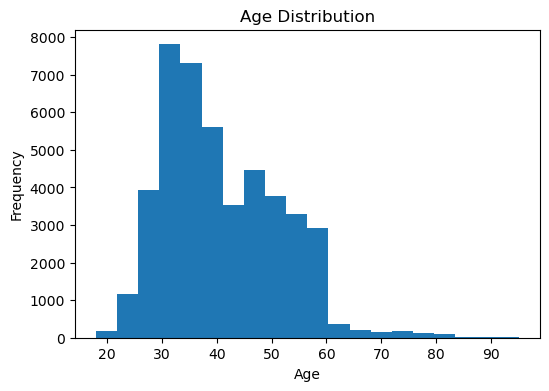

In [45]:
#Total workforce metrics
df_analysis['age'].plot(kind='hist', bins=20, figsize=(6,4), title='Age Distribution')
plt.xlabel('Age')
plt.show()

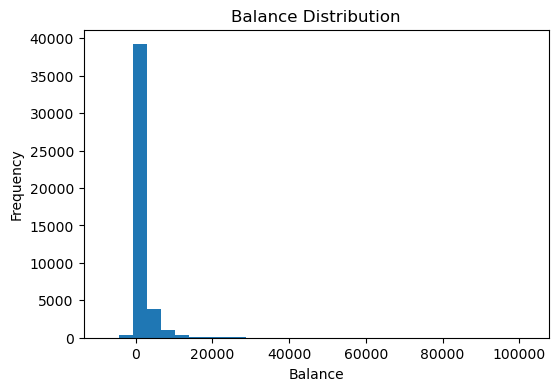

In [46]:
# Balance Distribution
df_analysis['balance'].plot(kind='hist', bins=30, figsize=(6,4), title='Balance Distribution')
plt.xlabel('Balance')
plt.show()

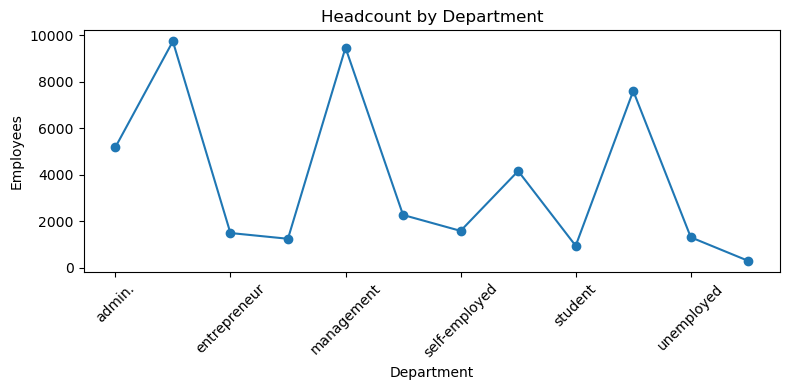

In [47]:
#Department performance 
df_analysis = df.copy()

df_analysis['yes_flag'] = (df_analysis['y'] == 'yes').astype(int)

dept_perf = df.groupby('job').agg(
    headcount   = ('y', 'count'),
    avg_salary  = ('balance', 'mean'),
)

dept_perf_sorted = dept_perf.sort_index()

dept_perf_sorted['headcount'].plot(
    kind='line',
    figsize=(8, 4),
    marker='o',
    title='Headcount by Department'
)

plt.ylabel('Employees')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

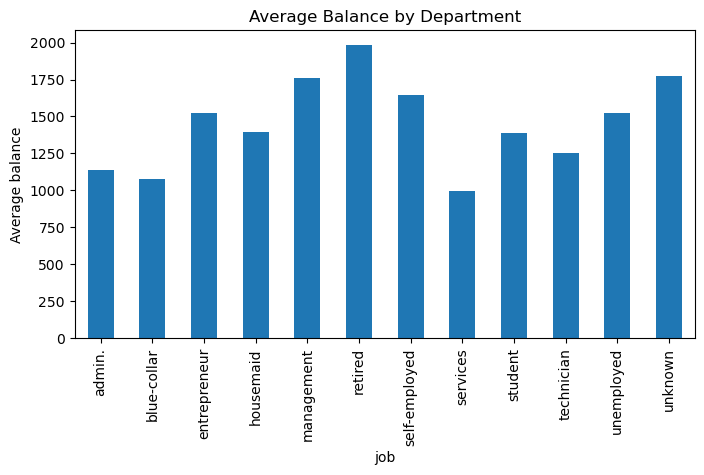

In [48]:
#Average balance by department
dept_perf = df_analysis.groupby('job').agg(
    headcount   = ('y', 'count'),
    avg_bal  = ('balance', 'mean'),
    yes_rate_pct = ('yes_flag', lambda x: x.mean() * 100)
)

dept_perf['avg_bal'].plot(kind='bar', figsize=(8,4), title='Average Balance by Department')
plt.ylabel('Average balance')
plt.show()


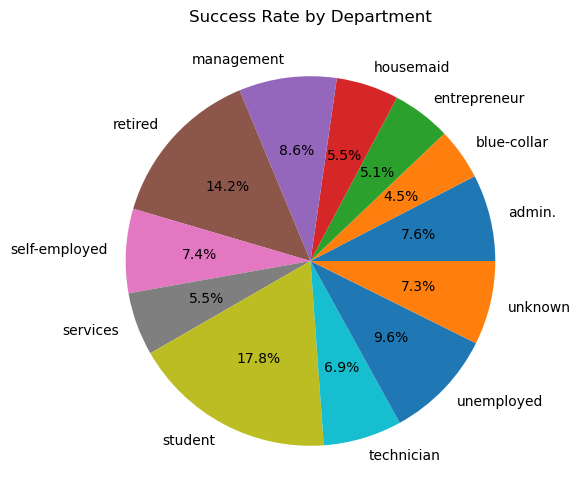

In [49]:
plt.figure(figsize=(6,6))
plt.pie(
    dept_perf['yes_rate_pct'],
    labels=dept_perf.index,
    autopct='%1.1f%%'
)
plt.title('Success Rate by Department')
plt.show()

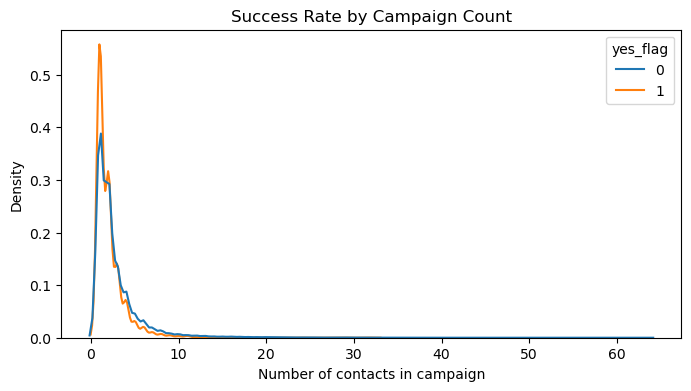

In [50]:
#Success rate by campaign number
plt.figure(figsize=(8,4))
sns.kdeplot(data=df_analysis, x='campaign', hue='yes_flag', common_norm=False)
plt.title('Success Rate by Campaign Count')
plt.xlabel('Number of contacts in campaign')
plt.ylabel('Density')
plt.show()


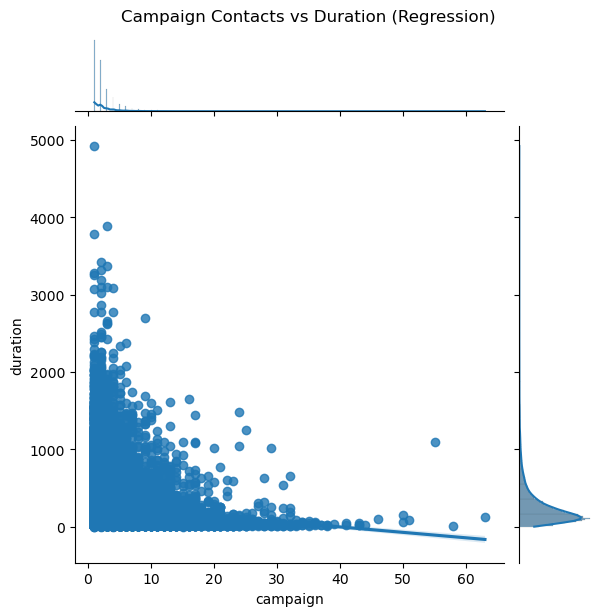

In [51]:
#duration by campaign number
sns.jointplot(
    data=df_analysis,
    x='campaign',
    y='duration',
    kind='reg',
    height=6
)
plt.suptitle('Campaign Contacts vs Duration (Regression)', y=1.02)
plt.show()


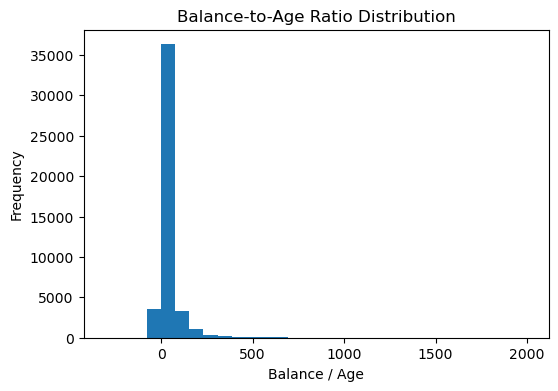

In [52]:
#Balance‑to‑age ratio histogram
df_analysis['balance_age_ratio'] = df_analysis['balance'] / df_analysis['age']

df_analysis['balance_age_ratio'].plot(kind='hist', bins=30, figsize=(6,4),
                            title='Balance-to-Age Ratio Distribution')
plt.xlabel('Balance / Age')
plt.show()

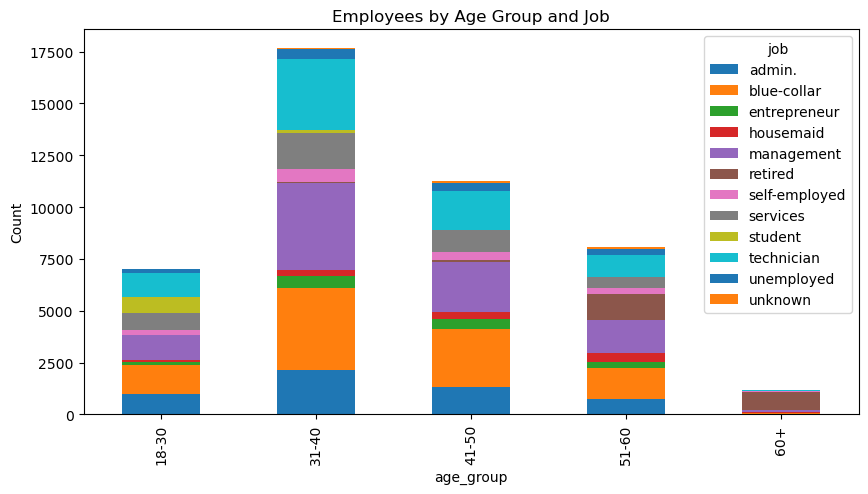

In [53]:
#Count by age group and job
age_bins   = [18, 30, 40, 50, 60, np.inf]
age_labels = ['18-30','31-40','41-50','51-60','60+']
df_analysis['age_group'] = pd.cut(df_analysis['age'], bins=age_bins, labels=age_labels)

salary_bins   = [df_analysis['balance'].quantile(q) for q in [0, 0.33, 0.66, 1]]
salary_labels = ['low','mid','high']
df_analysis['balance_group'] = pd.cut(df_analysis['balance'], bins=salary_bins,
                            labels=salary_labels, include_lowest=True)

age_job_counts = pd.crosstab(df_analysis['age_group'], df_analysis['job'])

age_job_counts.plot(kind='bar', stacked=True, figsize=(10,5),
                    title='Employees by Age Group and Job')
plt.ylabel('Count')
plt.show()

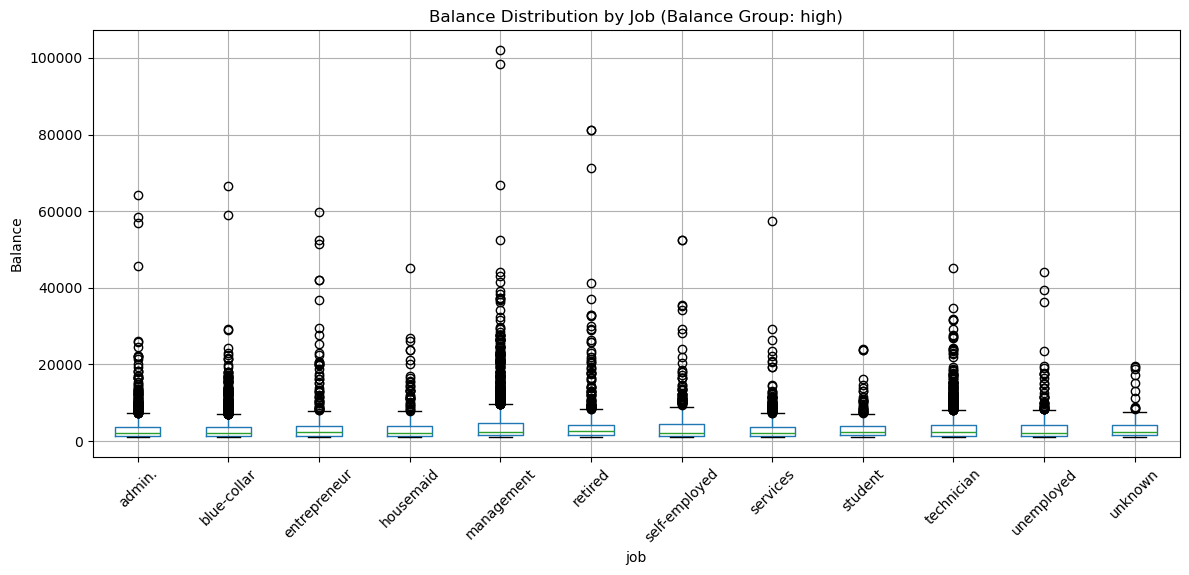

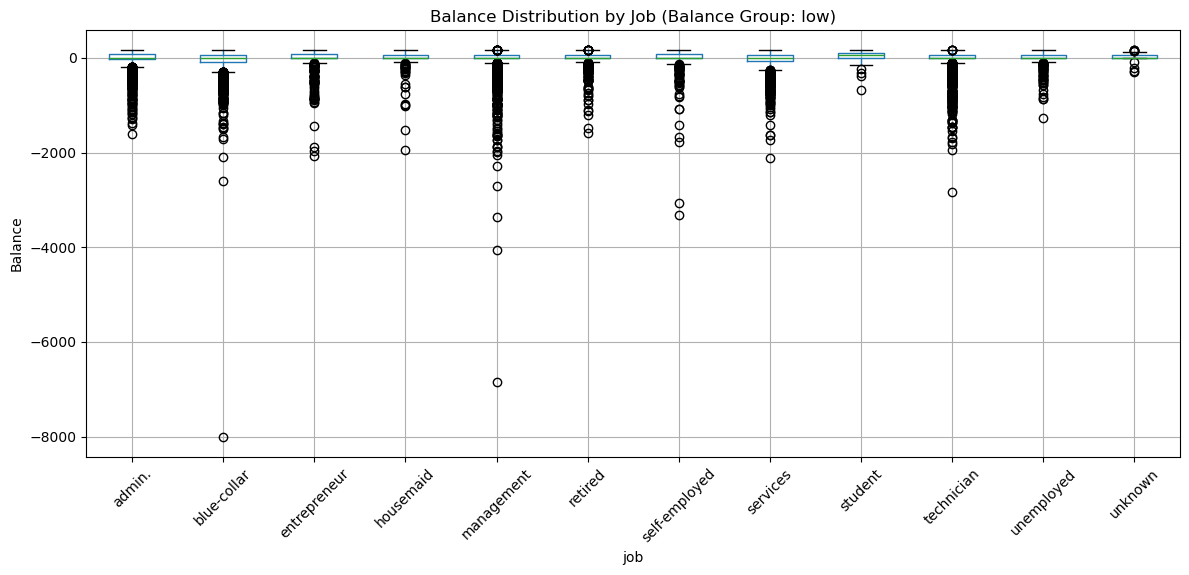

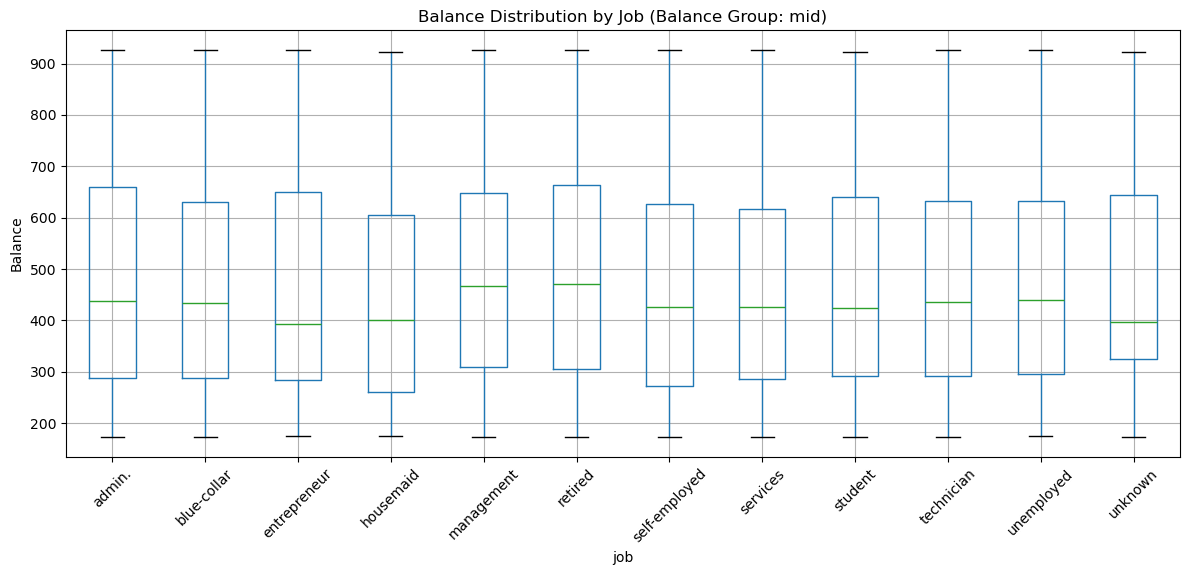

In [54]:
#Count by balance group and job
for balance_group in df_analysis['balance_group'].unique():
    subset = df_analysis[df_analysis['balance_group'] == balance_group]
    subset.boxplot(column='balance', by='job', figsize=(12,6))
    plt.title(f'Balance Distribution by Job (Balance Group: {balance_group})')
    plt.suptitle('')
    plt.ylabel('Balance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1200x1000 with 0 Axes>

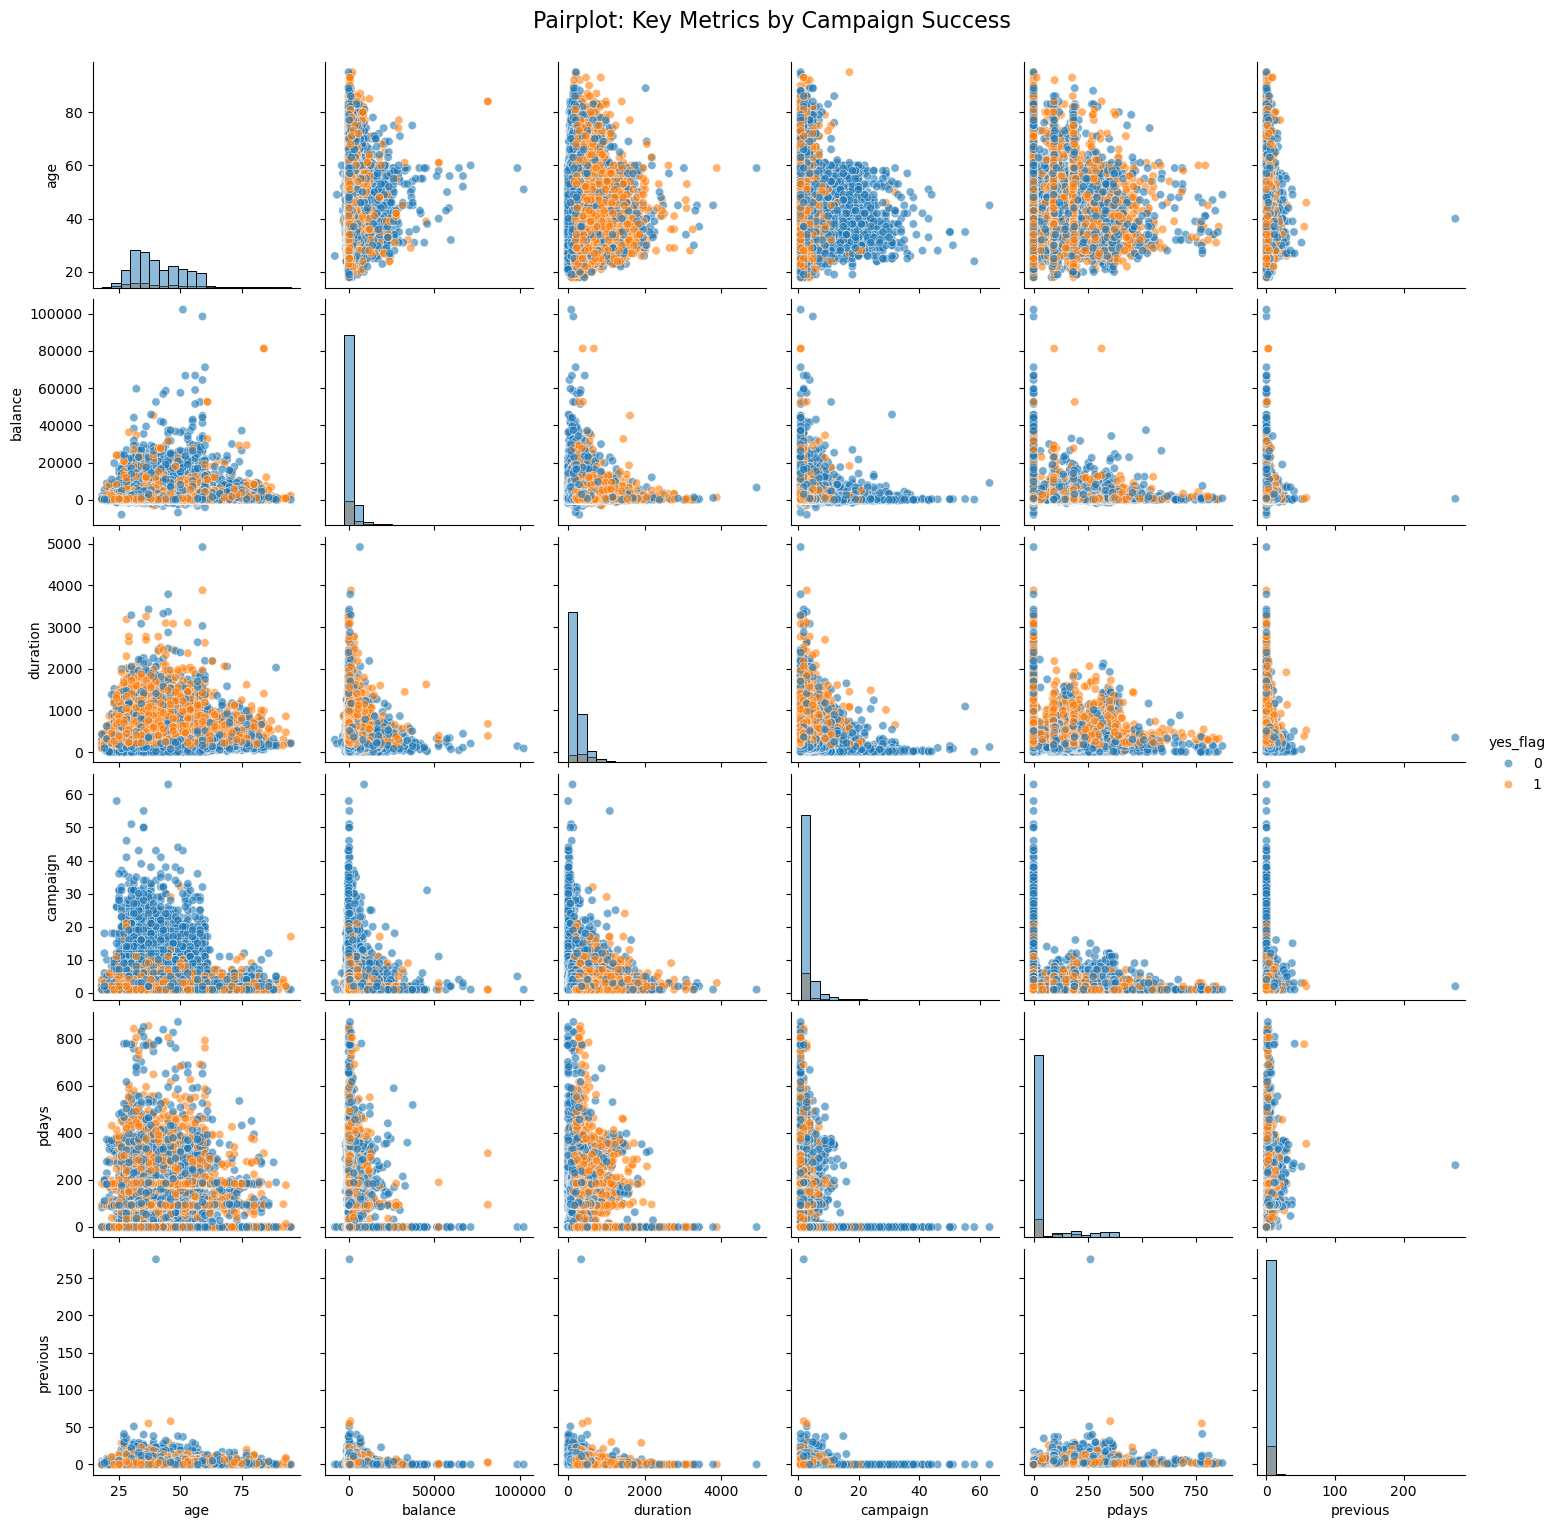

In [55]:
#key numeric columns from analysis
plot_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'yes_flag']

# Create pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_analysis[plot_cols], 
             hue='yes_flag',
             diag_kind='hist',
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 20})
plt.suptitle('Pairplot: Key Metrics by Campaign Success', y=1.02, fontsize=16)
plt.show()
